In [1]:
import cv2
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
lena = cv2.imread('..\Images\lena512.bmp', cv2.IMREAD_GRAYSCALE).astype('float64')

[]

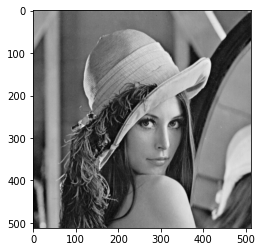

In [3]:
plt.imshow(lena, cmap='gray')
plt.plot()

# اعمال فیلتر های سوبل در حوزه مکان

In [4]:
sobel_h = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 9
sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 9

In [5]:
h_sobled_lena = signal.convolve2d(lena,sobel_h)
v_sobled_lena = signal.convolve2d(lena,sobel_v)
res = np.hstack((h_sobled_lena, v_sobled_lena))

[]

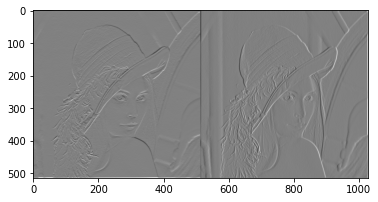

In [6]:
plt.imshow(res, cmap='gray')
plt.plot()

In [7]:
lena_fourie = np.fft.fft2(lena)
sobel_h_filter = np.zeros(lena.shape)
sobel_h_filter[0:3,0:3] = sobel_h
sobel_v_filter = np.zeros(lena.shape)
sobel_v_filter[0:3,0:3] = sobel_v

In [8]:
sobel_h_fourie = np.fft.fft2(sobel_h_filter)
sobel_v_fourie = np.fft.fft2(sobel_v_filter)

# تصویر تبدیل شده لنا در حوزه فرکانس

[]

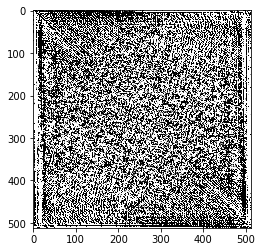

In [9]:
plt.imshow(lena_fourie.real, vmin=-100, vmax=100, cmap='gray')
plt.plot()

# اعمال فیلتر های سوبل به تصویر لنا در حوزه فرکانس

In [10]:
res = np.hstack((sobel_h_fourie.real, sobel_v_fourie.real))

[]

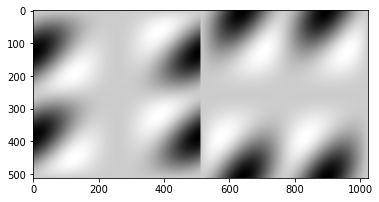

In [11]:
plt.imshow(res, cmap='gray')
plt.plot()

In [12]:
lena_h_freqency = sobel_h_fourie * lena_fourie
lena_v_freqency = sobel_v_fourie * lena_fourie

In [13]:
lena_h_freqency = np.fft.ifft2(lena_h_freqency)
lena_v_freqency = np.fft.ifft2(lena_v_freqency)
#res = np.hstack((np.absolute(lena_h_freqency), np.absolute(lena_v_freqency) ))

[]

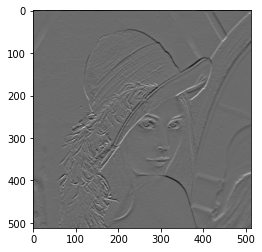

In [14]:
plt.imshow((lena_h_freqency).real, cmap='gray')
plt.plot()

[]

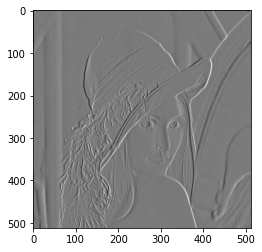

In [15]:
plt.imshow((lena_v_freqency).real, cmap='gray')
plt.plot()

فیلتر های افقی و عمودی سوبل را در دو حوزه ی مکان و فرکانس به تصویر لنا اعمال کردیم و نتیجه را نمایش دادیم و در نهایت تصاویر حاصل شده یکسان بودند.
در حوزه مکان از کانوولوشن ماتریس فیلتر در تصویر اصلی و در حوزه فرکانس از ضرب داخلی ماتریس های استفاده کردیم